In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('anime.csv')
df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [4]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [10]:
colunas_deletadas = ["English name", "Japanese name", "Aired", "Premiered", "Producers", "Licensors", "Studios", "Source", "Ranked", "Popularity", "Members", "Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1"]

df = df.drop(columns=colunas_deletadas)

KeyError: "['English name', 'Japanese name', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Ranked', 'Popularity', 'Members', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'] not found in axis"

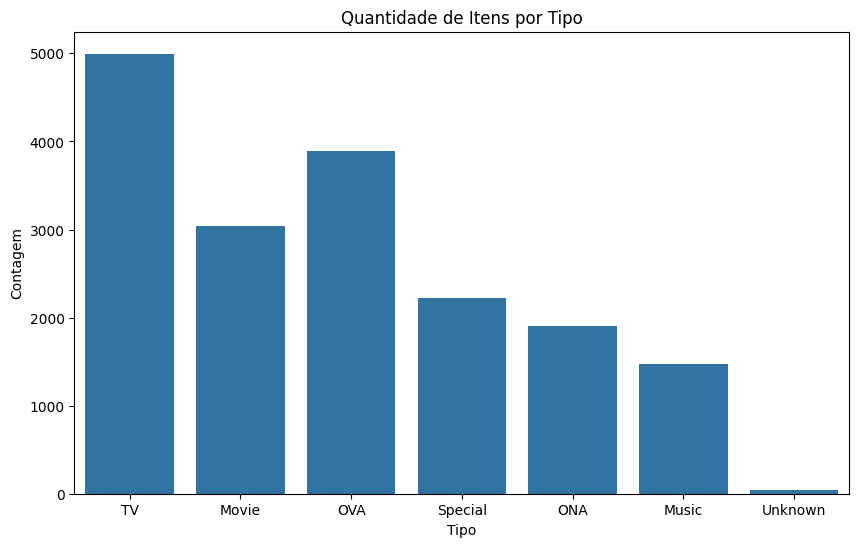

In [11]:
# Mostrar a quantidade de itens por tipo (série, filme, etc.).

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type')
plt.title('Quantidade de Itens por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()

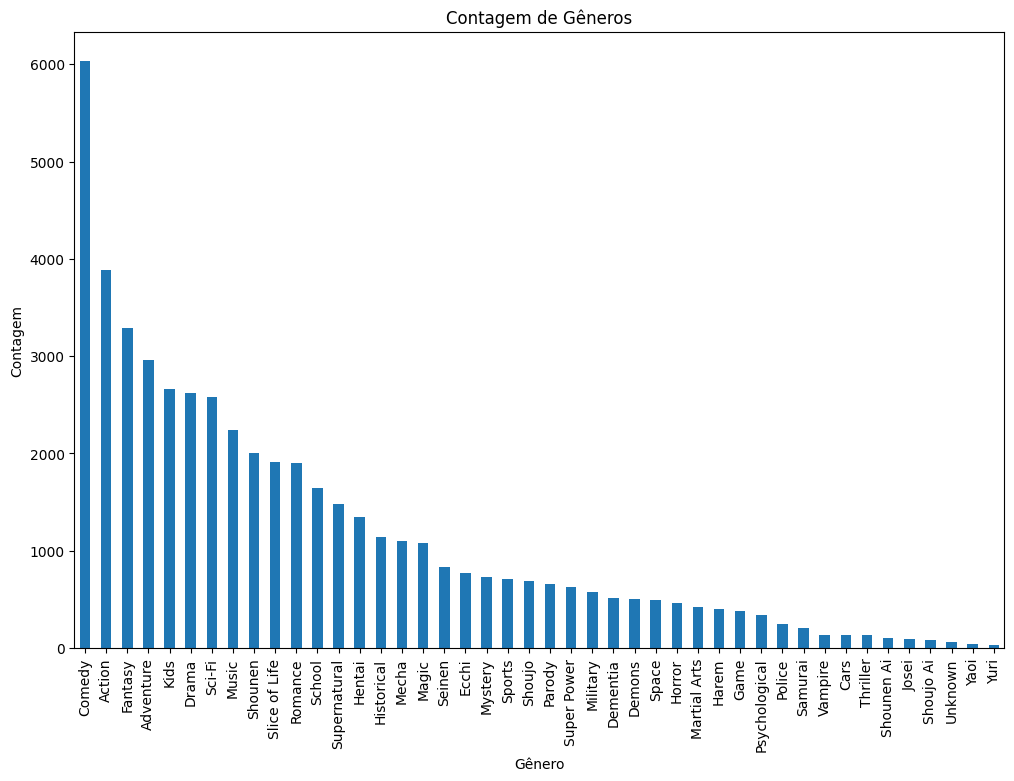

In [12]:
# Mostrar a contagem de cada gênero.

plt.figure(figsize=(12, 8))
df['Genres'].str.split(', ', expand=True).stack().value_counts().plot(kind='bar')
plt.title('Contagem de Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()


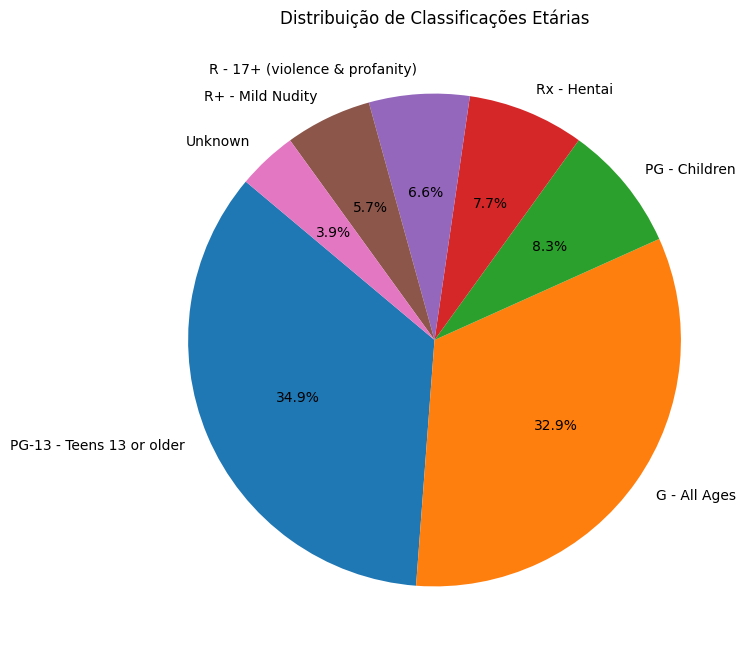

In [13]:
# A proporção de cada classificação etária.

plt.figure(figsize=(8, 8))
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Classificações Etárias')
plt.ylabel('')
plt.show()


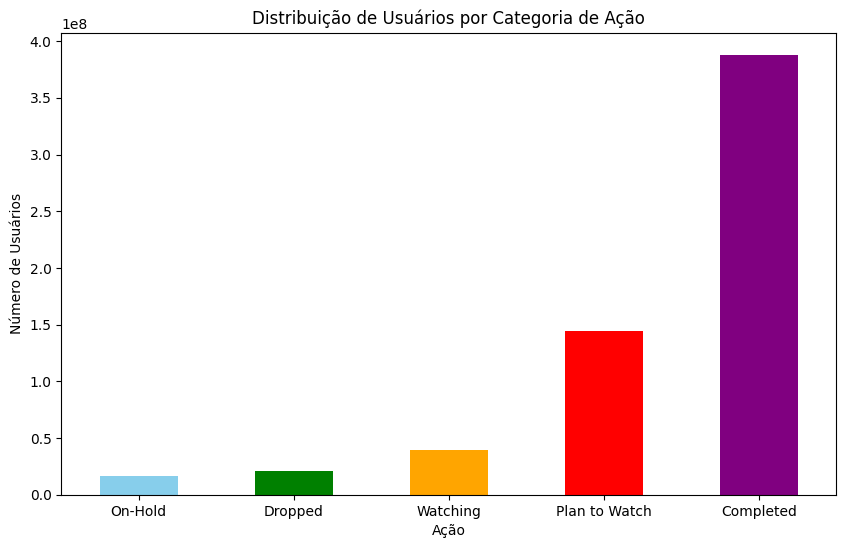

In [14]:
# Distribuição por categoria de Ação

df_subset = df[['Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']].sum().sort_values()

plt.figure(figsize=(10, 6))
df_subset.plot(kind='bar', stacked=True, color=['skyblue', 'green', 'orange', 'red', 'purple'])
plt.title('Distribuição de Usuários por Categoria de Ação')
plt.xlabel('Ação')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.show()

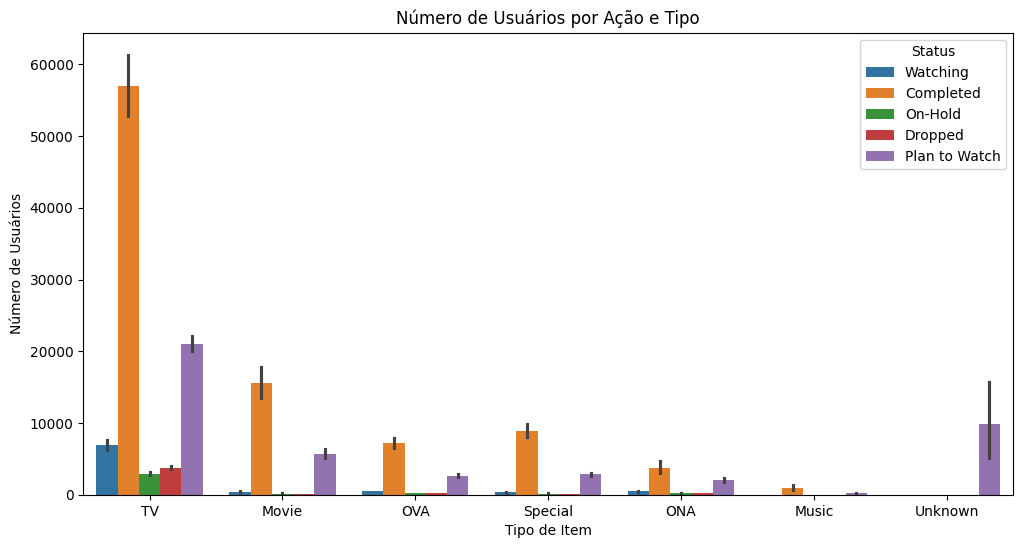

In [15]:
# gráfico de barras agrupadas para ação e tipo

plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='Type', value_vars=['Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch'],
                    var_name='Status', value_name='Número de Usuários')
sns.barplot(data=df_melted, x='Type', y='Número de Usuários', hue='Status')
plt.title('Número de Usuários por Ação e Tipo')
plt.xlabel('Tipo de Item')
plt.ylabel('Número de Usuários')
plt.show()

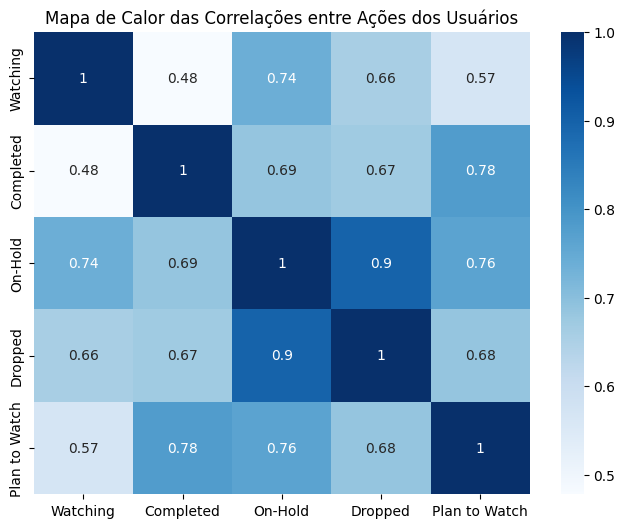

In [16]:
# Para entender as correlações entre as diferentes ações dos usuários

plt.figure(figsize=(8, 6))
correlation_matrix = df[['Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Mapa de Calor das Correlações entre Ações dos Usuários')
plt.show()

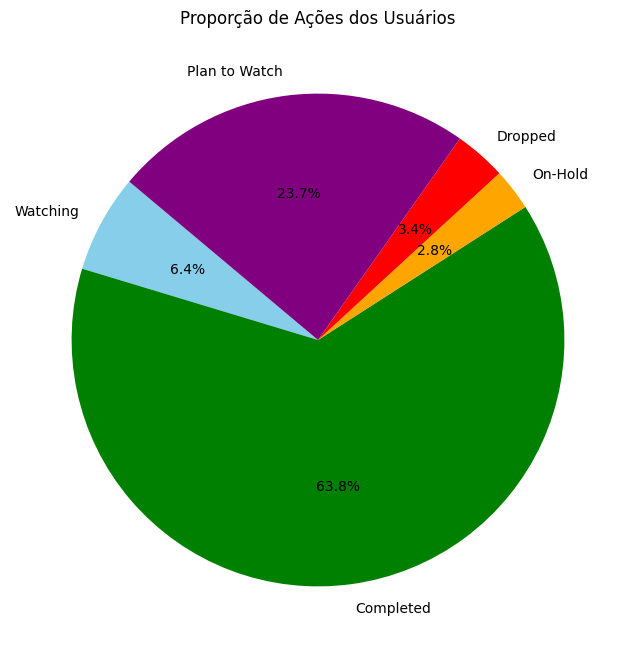

In [17]:
# Para visualizar a proporção de cada ação dos usuários em relação ao total

plt.figure(figsize=(8, 8))
df_total = df[['Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']].sum()
df_total.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'green', 'orange', 'red', 'purple'])
plt.title('Proporção de Ações dos Usuários')
plt.ylabel('')
plt.show()

In [18]:
from scipy.stats import ttest_ind

# Filtrar os dados para séries e filmes
df_series = df[df['Type'] == 'TV']
df_filmes = df[df['Type'] == 'Movie']

# Obter os números de usuários assistindo
watching_series = df_series['Watching'].dropna()
watching_filmes = df_filmes['Watching'].dropna()

media_series = watching_series.mean()
media_filmes = watching_filmes.mean()

print(f"Média de usuários assistindo séries de TV: {media_series:.2f}")
print(f"Média de usuários assistindo filmes: {media_filmes:.2f}")

# Realizar o Teste T de Student
t_stat, p_val = ttest_ind(watching_series, watching_filmes, equal_var=False)
print(f"Teste T: t-stat = {t_stat}, p-value = {p_val}")

alpha = 0.05  # Nível de significância
if p_val < alpha:
    print(f"\nTeste T: t-stat = {t_stat:.2f}, p-value = {p_val:.2e}")
    print("Resultado: Existe uma diferença estatisticamente significativa entre o número de usuários assistindo séries de TV e filmes.")

    # Comparação das médias
    if media_series > media_filmes:
        print("A média de usuários assistindo séries de TV é maior do que a de filmes.")
    else:
        print("A média de usuários assistindo filmes é maior do que a de séries de TV.")
else:
    print(f"\nTeste T: t-stat = {t_stat:.2f}, p-value = {p_val:.2e}")
    print("Resultado: Não existe uma diferença estatisticamente significativa entre o número de usuários assistindo séries de TV e filmes.")

Média de usuários assistindo séries de TV: 6892.78
Média de usuários assistindo filmes: 396.53
Teste T: t-stat = 17.86897019934116, p-value = 2.6905223509351716e-69

Teste T: t-stat = 17.87, p-value = 2.69e-69
Resultado: Existe uma diferença estatisticamente significativa entre o número de usuários assistindo séries de TV e filmes.
A média de usuários assistindo séries de TV é maior do que a de filmes.


In [19]:
from scipy.stats import chi2_contingency

# tabela de contingência para 'Type' e 'Watching'
contingency_table = pd.crosstab(df['Type'], df['Watching'] > 0)

# Realizar o Teste Qui-Quadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Tabela de Contingência:\n{contingency_table}\n")
print(f"Teste Qui-Quadrado: Chi2-stat = {chi2_stat:.2f}, p-value = {p_val:.2e}")
print(f"Graus de Liberdade: {dof}")
print(f"Valores Esperados:\n{expected}")

# Interpretação
alpha = 0.05  # Nível de significância
if p_val < alpha:
    print("\nResultado: Existe uma associação estatisticamente significativa entre o tipo de anime e a ação dos usuários.")
else:
    print("\nResultado: Não existe uma associação estatisticamente significativa entre o tipo de anime e a ação dos usuários.")

Tabela de Contingência:
Watching  False  True 
Type                  
Movie        90   2951
Music        29   1440
ONA          63   1844
OVA          31   3863
Special       9   2209
TV          102   4894
Unknown      33      4

Teste Qui-Quadrado: Chi2-stat = 1499.32, p-value = 0.00e+00
Graus de Liberdade: 6
Valores Esperados:
[[6.18173898e+01 2.97918261e+03]
 [2.98618039e+01 1.43913820e+03]
 [3.87654595e+01 1.86823454e+03]
 [7.91571575e+01 3.81484284e+03]
 [4.50874616e+01 2.17291254e+03]
 [1.01558592e+02 4.89444141e+03]
 [7.52135292e-01 3.62478647e+01]]

Resultado: Existe uma associação estatisticamente significativa entre o tipo de anime e a ação dos usuários.


In [20]:
import sqlite3
anime_amostra = df.sample(350)

# Criar uma conexão com o banco de dados SQLite na memória
conn = sqlite3.connect(':memory:')

# Exportar o DataFrame para o banco de dados SQLite
anime_amostra.to_sql('anime_amostra', conn, index=False, if_exists='replace')

# Consultar o banco de dados SQLite
query_sql = """
SELECT Type, COUNT("Mail ID") AS Contagem
FROM anime_amostra
GROUP BY Type;
"""

contagem_por_typ = pd.read_sql_query(query_sql, conn)
print(contagem_por_typ)

# Fechar a conexão
conn.close()

      Type  Contagem
0    Movie        61
1    Music        32
2      ONA        35
3      OVA        77
4  Special        42
5       TV       103
